# Scikit-Learn

Iport required packages: [1],[3]

In [36]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score

Configure plot appearance: [1]

In [37]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [38]:
# Reading data:

In [39]:
# Load Wine Quality data set from folder: [3]
df = pd.read_csv("winequality-red.csv", delimiter=';')

# Look at the data:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [40]:
# Summary of statisics:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Initial Visual analysis:

Here we use a for loop to iterate through every collumn and compare them to the last collumn, quality. We then create an individual scatter plot for each of them so that we can see the relationships between each attribute and the quality of the wine.

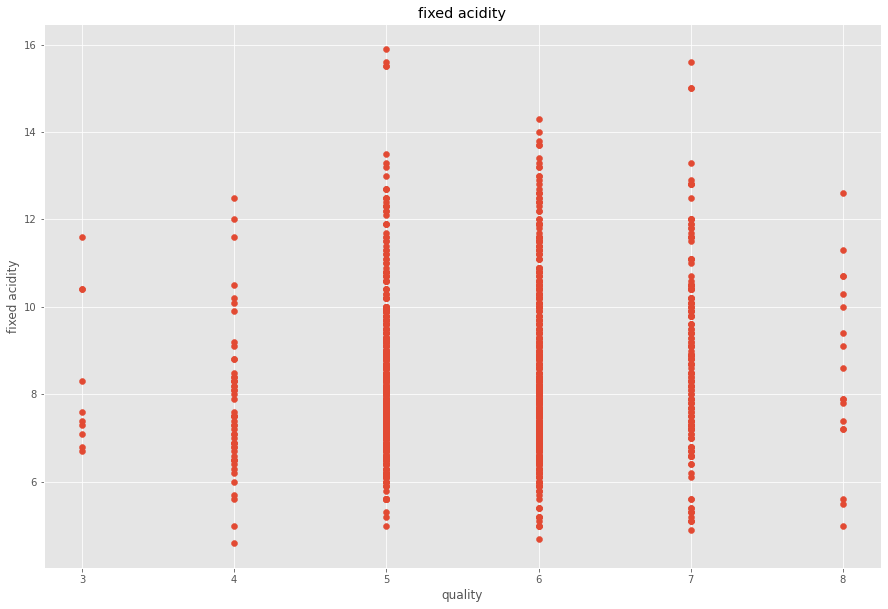

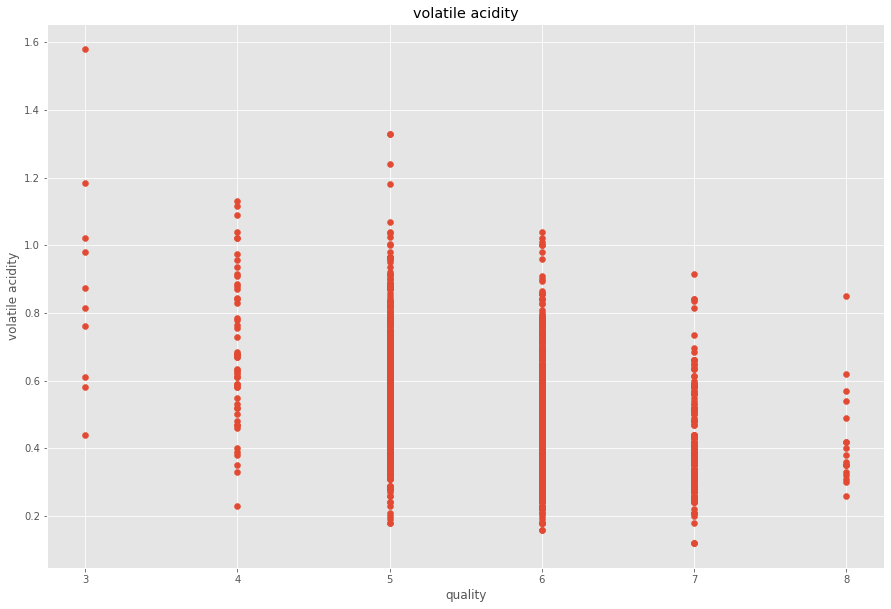

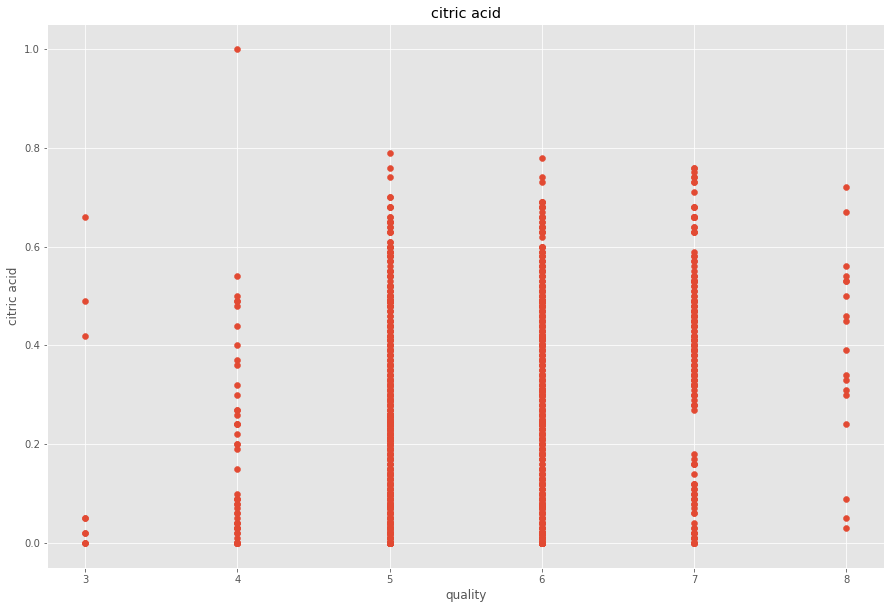

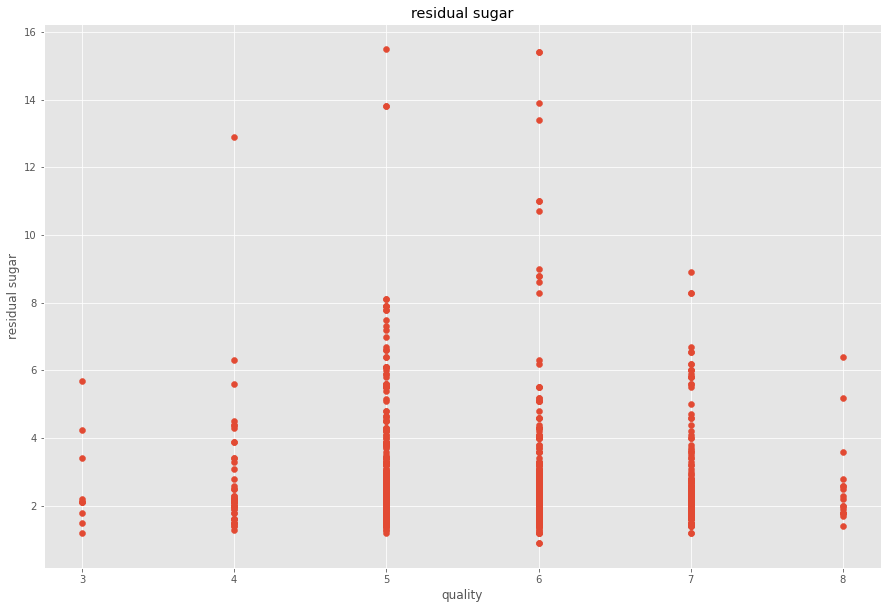

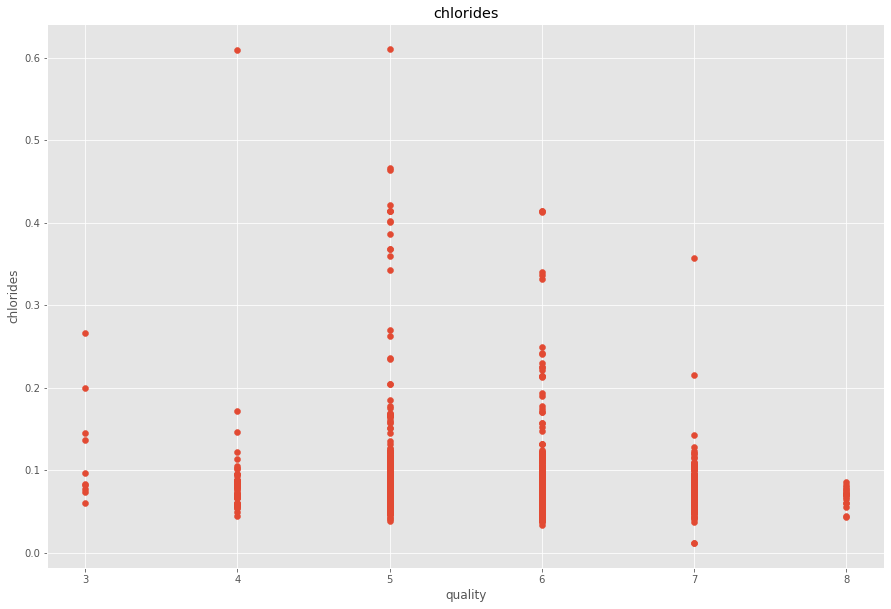

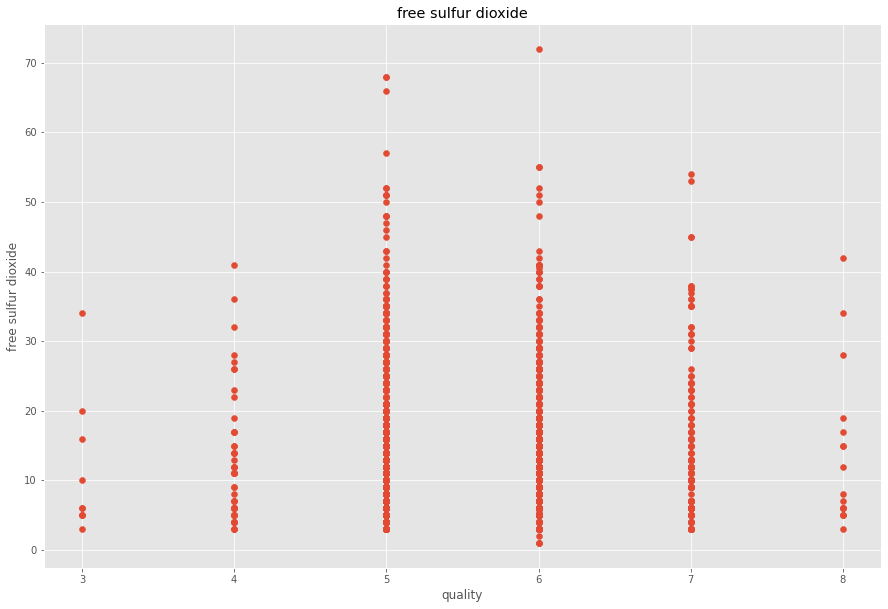

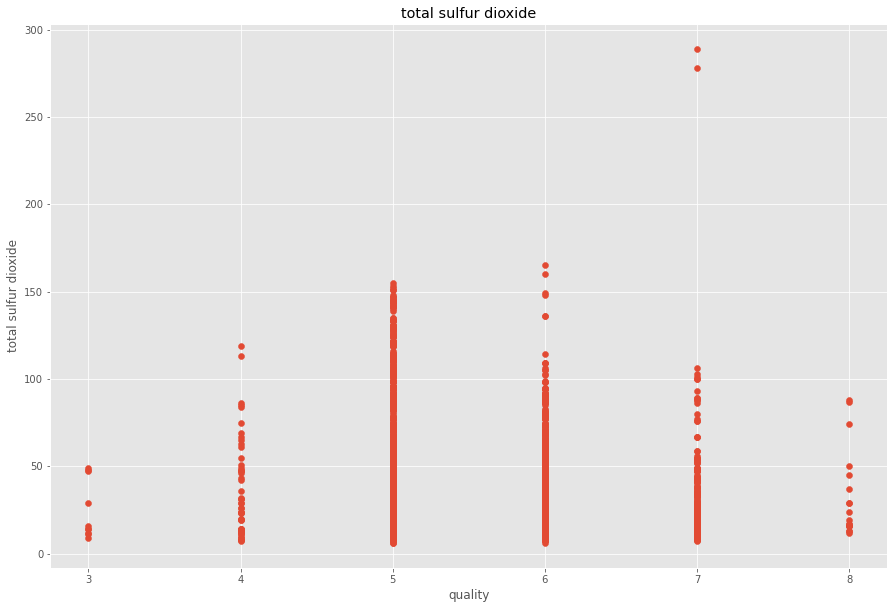

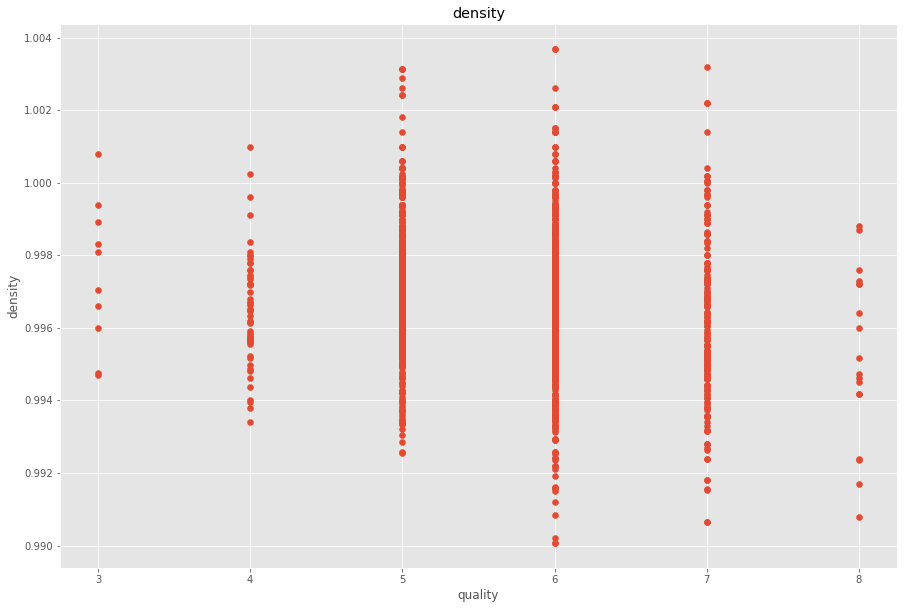

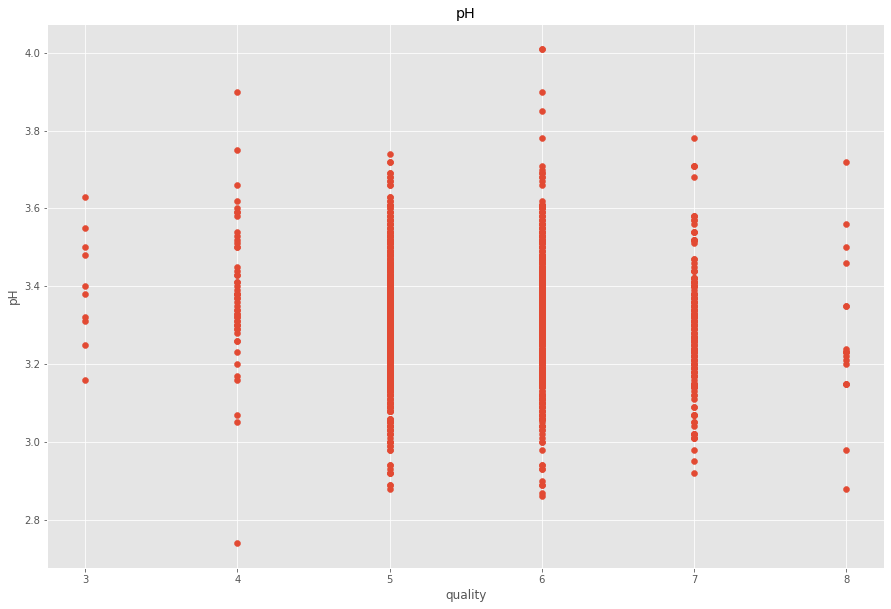

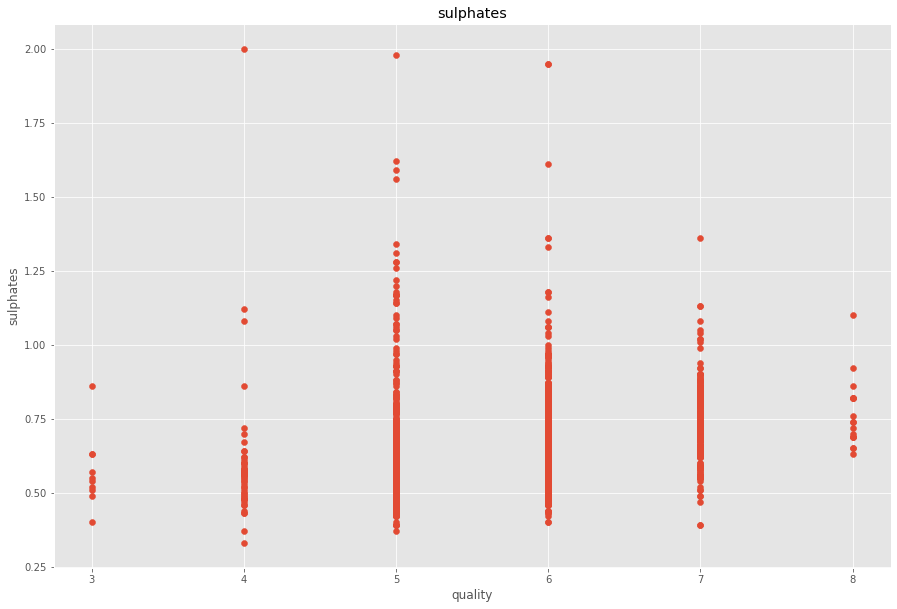

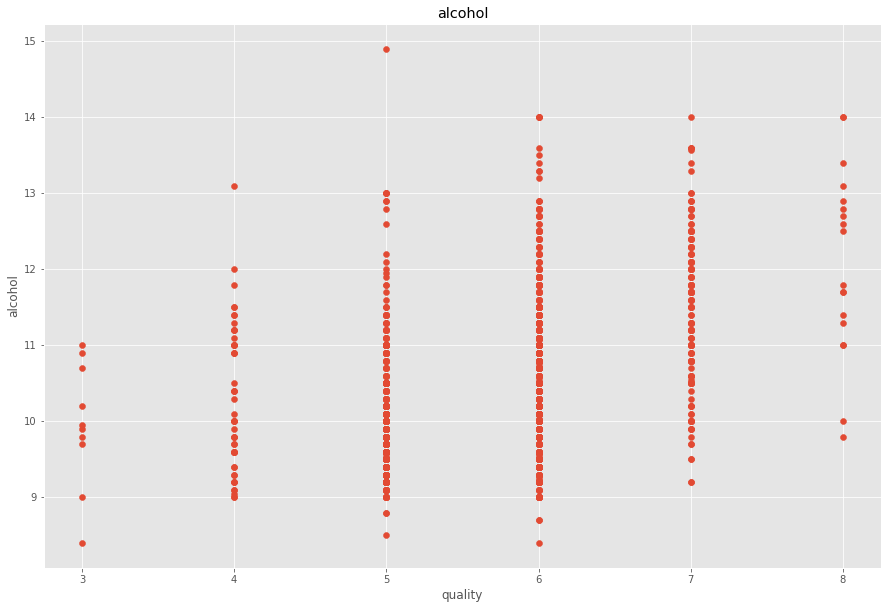

In [41]:
for label in df.columns[:-1]:
# for label in ['alcohol']:
    plt.scatter(df['quality'], df[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.show()
    
# [4]

From the above plots we can see that there is no real definitive pattern appearing based on any one attribute of the dataset from which we could draw a clear conclusion from.

We can also see that there are no wines that rate higher or lower than range 3-9.

As a result, we will now implement some machine learning techniques to better classify the quality of these wines based on more than one feature being compared against quality simultaneaously through a variety of methods.

## Splitting the data:

divide the data up into training and testing data.

In [42]:
# To make the qualification a bit simpler, we can create bins to divide the 
# range 3-9 into 3 broader classes:
# low(0), mid(1), and high(2)
bins = [0, 5.5, 7.5, 10] # this means 3-5.5 are low, 6-7.5 are mid, 8-9 are high
# label these classes usinng 0,1,2 to correspond with above class names.
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#### Next we define our inputs and ouputs:

In [44]:
# Set x as inputs, all collumns except for the quality:
x = df[df.columns[:-1]]

# Set Y as output - quality:
y = df['quality']

## Standardization

Now we standardize the data to fit our classification algorithms:

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data. [6]

StandardScaler changes each feature column f:,i to:

$$f'_{:,i} = \frac{f_{:,i} - mean(f_{:,i})}{std(f_{:,i})}.$$
[5]


Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.

The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values. [7]

To illustrate, consider data set:

{1,2,3,4,5} 

which consists of 5 one dimensional data points (each data point has one feature),
After applying StandardScaler, data set becomes:

{−1.41,−0.71,0.,0.71,1.41}.

[6]

In [48]:
# Standardise data:
sc = StandardScaler()

In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently of each feature. 

fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data. [7]

In [ ]:
x = sc.fit_transform(x)

In [58]:
# Create training & testing set variables:
# test_size=.2 - 20% of set will be used as test data, vs 80% training data.
# Random state standardised to reproduce data later.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=55)

In [59]:
# Summarize data
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       3
top          1
freq       665
Name: quality, dtype: int64
count     320
unique      3
top         1
freq      172
Name: quality, dtype: int64


## Classification

#### What is a classifier? 

Basically it is something that takes in an item and based on given data and decides what class that item is in. 

In this case our classes are low, medium and high quality wines.

## K Nearest Neighbors:

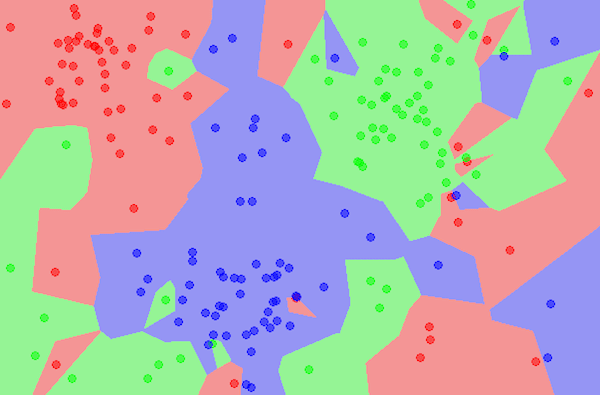

Looks at a given point and checks it's nearest 'K' neighbors. (The value of K can be set to however many you like)

Let's say we chose a value of K to be 5 - If the majority of the nearest neighbors is one partcular colour, the algorithm assumes the item in questio falls under the same category.

As you can see with the above image, there are often many fringe cases where points of one color will exist independantly within a cluster of another. These outliers are what makes classification more complex than just drawing a line, however when this same concept is applied to an array of dimensions these grey areas can be classified much more effectively.

In [69]:
#Create classifier with k value = 3:
n3 = KNeighborsClassifier(n_neighbors = 3)

# fit data to the KNN model:
n3.fit(x_train, y_train)

# Make predicitions based on model:
pred_n3 = n3.predict(x_test)

# Compare classification predictions to known results:
print(classification_report(y_test, pred_n3))

cross_val = cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

# [3]

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       143
           1       0.72      0.76      0.74       172
           2       0.00      0.00      0.00         5

    accuracy                           0.71       320
   macro avg       0.47      0.48      0.48       320
weighted avg       0.70      0.71      0.70       320

0.7193282480314961


As we can see from above, the accuracy isn't the most accurate at around 70-73%. 

What if we were to change the value of K to 5?:

In [89]:
#Create classifier with k value = 5:
n5 = KNeighborsClassifier(n_neighbors = 5)

# fit data to the KNN model:
n5.fit(x_train, y_train)

# Make predicitions based on model:
pred_n5 = n3.predict(x_test)

# Compare classification predictions to known results:
print(classification_report(y_test, pred_n5))

# Cross validate predictions to get mean accuracy of method:
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       143
           1       0.72      0.76      0.74       172
           2       0.00      0.00      0.00         5

    accuracy                           0.71       320
   macro avg       0.47      0.48      0.48       320
weighted avg       0.70      0.71      0.70       320

0.7067913385826772


In this case this actually causes it to be marginally less accurate.

There is an art to deciding what value to use for K. There are many different methods to define the most favorable value for K, but none of these can be considered a standard approach for all situations, as the optimal value is dependent on the dataset. 

Funnily, in this case after messing around with countless values for K, the highest accuracy was actually gained from a value of 1. I imagine this is not always the case at all, however.

Vlues for K that are too high tend to reach a point of diminishing returns, as there will be many points that are being considered that are outside the relevant scope of useful comparison.

## Tree Classifiers:

### Decision Trees



Basically what a decision tree does is it splits the data over and over again asking a variaety of divisive questions which can be used to differentiate between classes, such as 'is the PH > x', 'is the volatile acidity < y' and so on.

In [95]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))

cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       143
           1       0.70      0.69      0.70       172
           2       0.17      0.20      0.18         5

    accuracy                           0.67       320
   macro avg       0.51      0.52      0.51       320
weighted avg       0.67      0.67      0.67       320

0.7138041338582677


### Random Forest

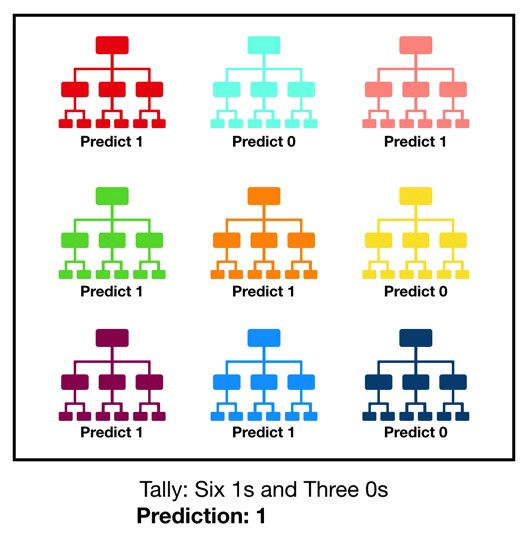

A random forest works by utilising the same concept as a decision tree, however, as it's name suggests, it is actually made up of a number of decision trees.

This method randomly generates a set of decision trees, and as we can see from the above image, it can then tally the outcomes of the overally set and make a decision based on majority outcome.

Because of this element of randomness this method generally tends to be more effective than any individual decision tree.

In [94]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))

cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

#[4], [3]

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       143
           1       0.80      0.81      0.81       172
           2       1.00      0.20      0.33         5

    accuracy                           0.79       320
   macro avg       0.86      0.60      0.64       320
weighted avg       0.79      0.79      0.79       320

0.7943467027559056


And as predicted, the random forest has a much higher rate of accuracy, and comes in around the top at close to 80%.

So why then would we ever chose a decision tree? Well sometimes they are more suited to smaller data sets where it is important to be able to interpret the process a bit more. Decision trees keep things at a simpler level, and are also faster and more lightweight.

Random forests are most useful on large datasets, where interpretation won't be too granular and training time isn't in short supply.

[9]

## Stochastic Gradient Descent:

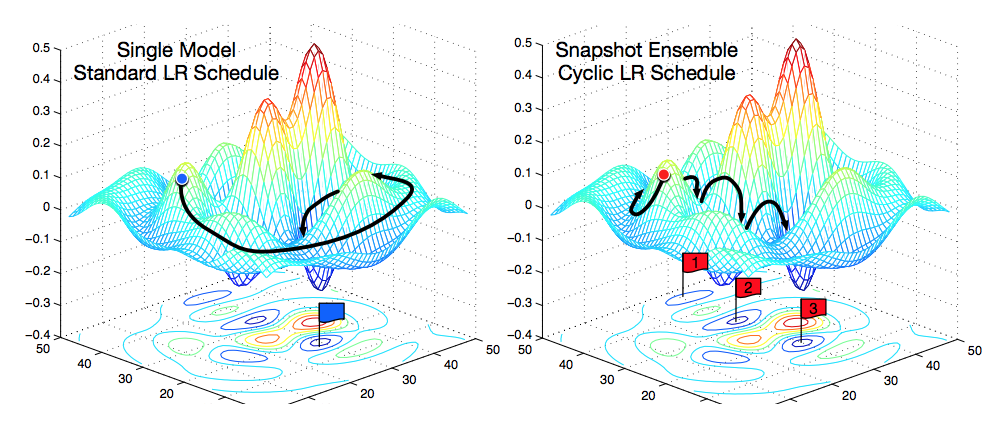

Stochastic Gradient descent uses a loss function to classify data.

It is a very popular and common algorithm, used in cpuntless machine learning algorithms. It is probably best known for the factthat it forms the basis of Neural Networks.

# Bibliography:

[1] https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/iris-classification.ipynb

[2]https://archive.ics.uci.edu/ml/datasets/Wine+Quality 
- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

[3] https://www.youtube.com/watch?v=BqDae4GPnu0

[4] https://nbviewer.org/github/kying18/wine-classification/blob/master/red%20wine%20classification.ipynb

[5] https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer

[6] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

[7]https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

[8] https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.

[9] https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

[10]